# 🧠 Machine Learning Pipeline (Classification)
## Simple Dataset – Logistic Regression + KNN

---
## 1️⃣ Problem Definition

**Goal:**
Build a machine learning model that classifies activities into:
- **0 → ADL (Normal Activity)**
- **1 → FALL (Dangerous Fall)**

**Problem Type:**
- Supervised Learning
- Binary Classification






---

## 2️⃣ Data Collection

We create a **simple synthetic dataset** instead of using a complex real dataset.
This makes the pipeline easy to understand and explain.

### Features:
- Acceleration
- Angular Velocity
- Luminosity

### Label:
- 0 → ADL
- 1 → FALL


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Fix random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 50000

# Generate simple sensor-like data
acceleration = np.random.normal(5, 2, n_samples)
angular_velocity = np.random.normal(3, 1.5, n_samples)
luminosity = np.random.normal(100, 20, n_samples)

# Create labels
labels = np.where(
    (acceleration > 6) & (angular_velocity > 4),
    1,  # FALL
    0   # ADL
)

# Create dataset
df = pd.DataFrame({
    "Acceleration": acceleration,
    "AngularVelocity": angular_velocity,
    "Luminosity": luminosity,
    "Label": labels
})

df.head()

,Acceleration,AngularVelocity,Luminosity,Label
0,5.993428,3.147309,120.611892,0
1,4.723471,2.903838,76.892905,0
2,6.295377,4.427686,111.508744,1
3,8.046060,5.299247,87.615231,1
4,4.531693,4.030270,93.451944,0


---

## 3️⃣ Data Preprocessing

In this step we:
- Separate features and labels
- Scale features (important for KNN)

In [ ]:
X = df.drop(columns=["Label"])
y = df["Label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

## 4️⃣ Data Exploration & Visualization

We visualize the class distribution to check balance between ADL and FALL.


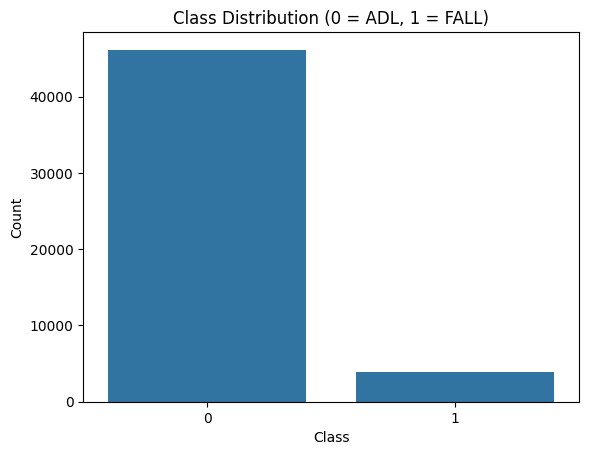

In [ ]:
plt.figure()
sns.countplot(x=y)
plt.title("Class Distribution (0 = ADL, 1 = FALL)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

---

## 5️⃣ Model Selection

Selected models:
- **Logistic Regression** → Linear, fast, interpretable
- **KNN** → Distance-based, non-linear

In [ ]:
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)

---

## 6️⃣ Model Training

We split the data and train both models.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

---

## 7️⃣ Model Evaluation

We evaluate the models using standard classification metrics.

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9228
           1       0.74      0.58      0.65       772

    accuracy                           0.95     10000
   macro avg       0.85      0.78      0.81     10000
weighted avg       0.95      0.95      0.95     10000

KNN Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9228
           1       0.97      0.95      0.96       772

    accuracy                           0.99     10000
   macro avg       0.99      0.97      0.98     10000
weighted avg       0.99      0.99      0.99     10000

SVM Results
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9228
           1       0.97      0.94      0.95       772

    accuracy                           0.99     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.9

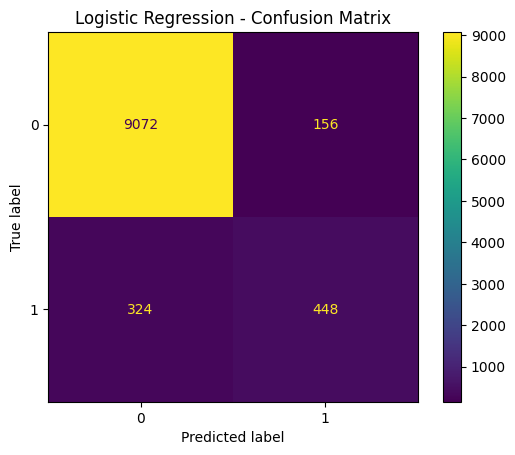

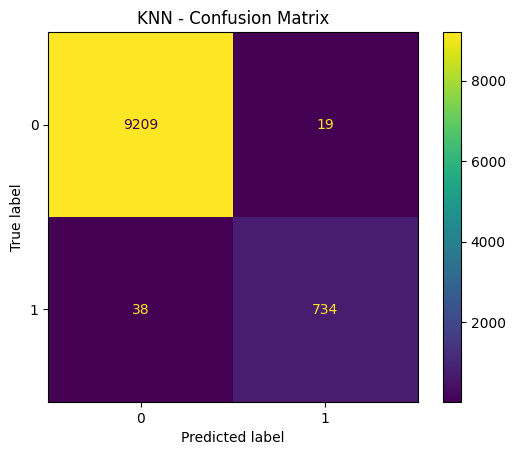

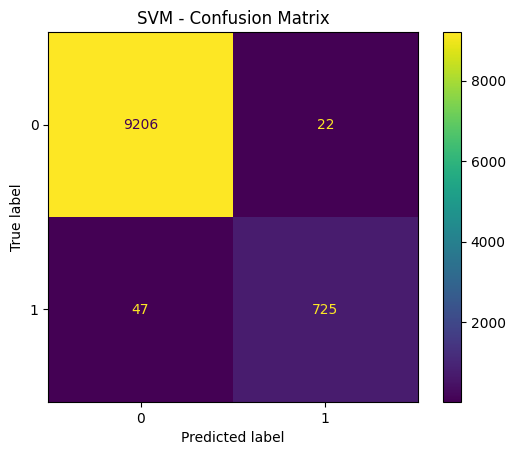

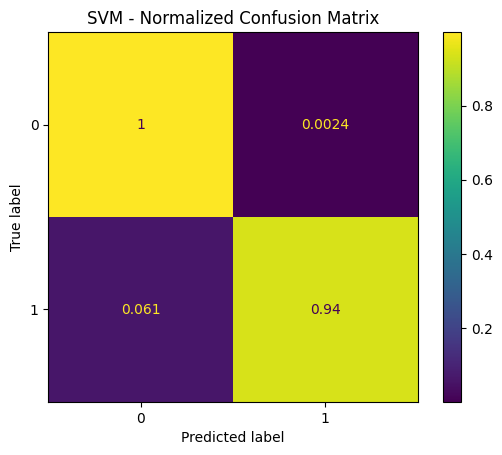

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_model = SVC(kernel='rbf', random_state=42)  # you can change kernel
svm_model.fit(X_train, y_train)

log_pred = logistic_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, log_pred))

print("KNN Results")
print(classification_report(y_test, knn_pred))

print("SVM Results")
print(classification_report(y_test, svm_pred))

cm_log = confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

cm_knn = confusion_matrix(y_test, knn_pred)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("KNN - Confusion Matrix")
plt.show()

cm_svm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM - Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(
    confusion_matrix(y_test, svm_pred, normalize='true')
).plot()
plt.title("SVM - Normalized Confusion Matrix")
plt.show()




---

## 8️⃣ Model Optimization

We optimize KNN by trying different values of **K**.

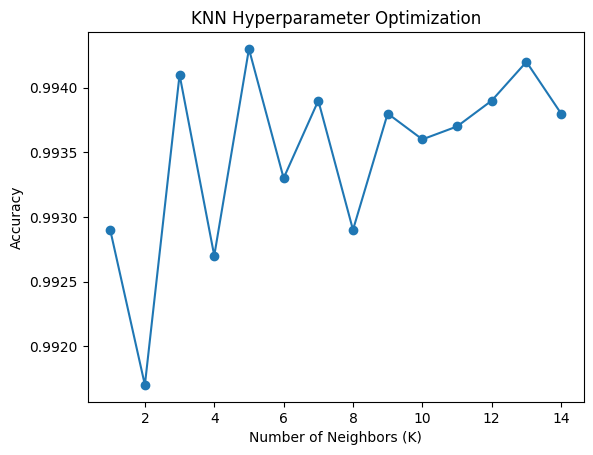

In [ ]:
accuracy_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))

plt.figure()
plt.plot(range(1, 15), accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Optimization")
plt.show()

---

## 9️⃣ Model Deployment

We save trained models and the scaler for later use.

In [ ]:
import joblib

joblib.dump(logistic_model, "logistic_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Models saved successfully!")


Models saved successfully!


---

## 🔟 Monitoring & Maintenance

After deployment, we monitor performance and test new data.

In [ ]:
# Example of predicting new unseen data
new_sample = np.array([[7.5, 5.2, 90]])
new_sample_scaled = scaler.transform(new_sample)

print("Logistic Prediction:", logistic_model.predict(new_sample_scaled))
print("KNN Prediction     :", knn_model.predict(new_sample_scaled))

Logistic Prediction: [0]
KNN Prediction     : [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---

## ✅ Summary

✔ Full 10-step ML pipeline.

✔ Simple and clear dataset.

✔ Google Colab ready.

✔ Easy to explain in exams and reports.

✔ Logistic Regression + KNN